Sheetal
Student Id-21007564

# Dataset 1

# SECTION 1: DECLARE THE MODULES

In [ ]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# SECTION 2: Data import and preprocess


In [ ]:
!pip install wget
import wget

link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached wget-3.2-py3-none-any.whl


In [ ]:
DataSet

'training_attack_types.txt'

In [ ]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names
# file, but it is supposed to be a binary feature according to the
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [ ]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [ ]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [ ]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)

In [ ]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

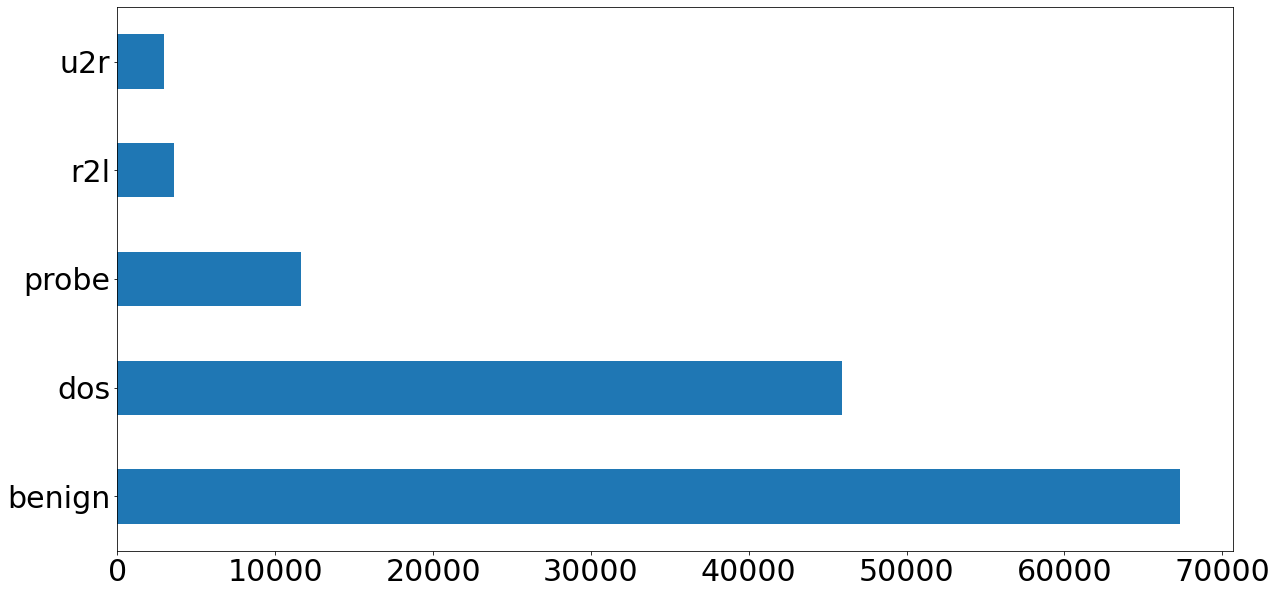

In [ ]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])

train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)

# SECTION 3: Multi class classification
## This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [ ]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, ConfusionMatrixDisplay

dt_classifier = DecisionTreeClassifier(random_state=17)
dt_classifier.fit(train_x, train_Y)

pred_y = dt_classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_Y, pred_y))

              precision    recall  f1-score   support

      benign       0.67      0.96      0.79      9711
         dos       0.96      0.79      0.86      7636
       probe       0.79      0.63      0.70      2423
         r2l       0.98      0.11      0.19      2574
         u2r       0.79      0.07      0.14       200

    accuracy                           0.76     22544
   macro avg       0.84      0.51      0.54     22544
weighted avg       0.81      0.76      0.73     22544



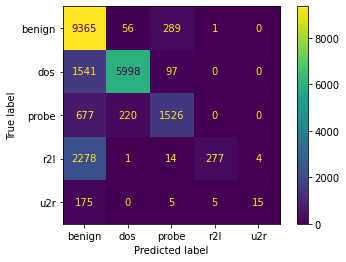

In [ ]:
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = results, display_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r'])

cm_display.plot()
plt.show()

## Build and evaluate RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

best_error = None
best_results = None
best_rf_classifier = None
num_estimators = 100

for i in range(100, 200, 10):
  rf_classifier = RandomForestClassifier(n_estimators=i)
  rf_classifier.fit(train_x, train_Y)

  pred_y = rf_classifier.predict(test_x)

  results = confusion_matrix(test_Y, pred_y)
  error = zero_one_loss(test_Y, pred_y)

  if not best_error or error < best_error:
    best_error = error
    best_results = results
    num_estimators = i
    best_rf_classifier = rf_classifier

print(best_results)
print(best_error)
print(num_estimators)

[[9453   67  191    0    0]
 [1545 5988  103    0    0]
 [ 771  162 1490    0    0]
 [2451    0    1  120    2]
 [ 193    0    0    4    3]]
0.2435237757274663
120


In [ ]:
print(classification_report(test_Y, pred_y))

              precision    recall  f1-score   support

      benign       0.64      0.97      0.77      9711
         dos       0.96      0.75      0.84      7636
       probe       0.85      0.61      0.71      2423
         r2l       0.97      0.03      0.06      2574
         u2r       0.67      0.01      0.02       200

    accuracy                           0.74     22544
   macro avg       0.82      0.48      0.48     22544
weighted avg       0.81      0.74      0.70     22544



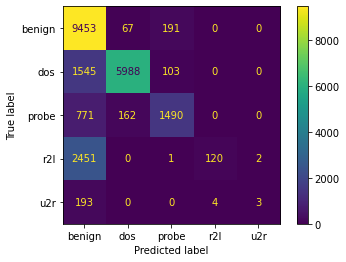

In [ ]:
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = best_results, display_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r'])

cm_display.plot()
plt.show()

## Build and Evaluate K-Nearest Neighbours Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

best_error = None
best_results = None
num_neighbours = None
best_knn_classifier = None

for i in range(3, 10, 2):
  classifier = KNeighborsClassifier(n_neighbors=i)
  classifier.fit(train_x, train_Y)

  pred_y = classifier.predict(test_x)

  results = confusion_matrix(test_Y, pred_y)
  error = zero_one_loss(test_Y, pred_y)

  if not best_error or error < best_error:
    best_error = error
    best_results = results
    num_neighbours = i
    best_knn_classifier = classifier

print(best_results)
print(best_error)
print(num_neighbours)

[[9443   55  210    2    1]
 [1610 5937   89    0    0]
 [ 595  180 1648    0    0]
 [2347    2   53  171    1]
 [ 105    0   85    4    6]]
0.2368257629524485
7


In [ ]:
print(classification_report(test_Y, pred_y))

              precision    recall  f1-score   support

      benign       0.66      0.97      0.79      9711
         dos       0.96      0.75      0.84      7636
       probe       0.80      0.68      0.74      2423
         r2l       0.96      0.07      0.12      2574
         u2r       0.83      0.03      0.05       200

    accuracy                           0.75     22544
   macro avg       0.84      0.50      0.51     22544
weighted avg       0.81      0.75      0.72     22544



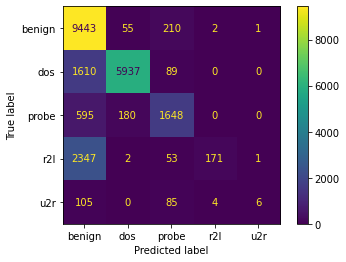

In [ ]:
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = best_results, display_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r'])

cm_display.plot()
plt.show()

## Build and Evaluate Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

solvers = ['lbfgs', 'saga', 'newton-cg', 'sag']
best_error = None
best_results = None
best_solver = None
best_C = None
best_lr_classifier = None

for solver in solvers:
  for regularization in [0.1, 1.0, 10.0]:
    classifier = LogisticRegression(random_state=0, solver=solver, C=regularization)
    classifier.fit(train_x, train_Y)

    pred_y = classifier.predict(test_x)

    results = confusion_matrix(test_Y, pred_y)
    error = zero_one_loss(test_Y, pred_y)

    if not best_error or error < best_error:
      best_error = error
      best_results = results
      best_solver = solver
      best_C = regularization
      best_lr_classifier = classifier

print(best_results)
print(best_error)
print(best_solver)
print(best_C)

[[8993   90  624    2    2]
 [1560 6052   24    0    0]
 [ 496   99 1825    3    0]
 [2471    2    2   99    0]
 [ 184    3    0    5    8]]
0.2469393186657204
lbfgs
1.0


In [ ]:
print(classification_report(test_Y, pred_y))

              precision    recall  f1-score   support

      benign       0.63      0.93      0.76      9711
         dos       0.90      0.73      0.81      7636
       probe       0.89      0.73      0.80      2423
         r2l       0.50      0.01      0.01      2574
         u2r       0.75      0.01      0.03       200

    accuracy                           0.73     22544
   macro avg       0.74      0.48      0.48     22544
weighted avg       0.74      0.73      0.69     22544



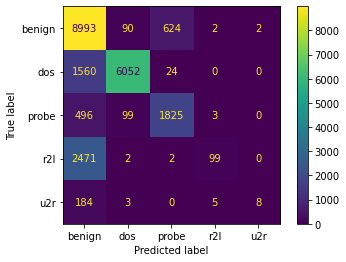

In [ ]:
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = best_results, display_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r'])

cm_display.plot()
plt.show()

## Build and Evaluate SVM

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier

svm_classifier = make_pipeline(StandardScaler(),
                           SGDClassifier(max_iter=20000, tol=1e-7, n_iter_no_change=3, learning_rate='adaptive', early_stopping=True, eta0=1))
svm_classifier.fit(train_x, train_Y)
pred_y = svm_classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)

[[9061  435  207    2    6]
 [1271 6351   14    0    0]
 [ 542  157 1593  131    0]
 [2466    2    3  100    3]
 [ 185    0    0    4   11]]
0.24077359829666434


In [ ]:
print(classification_report(test_Y, pred_y))

              precision    recall  f1-score   support

      benign       0.67      0.93      0.78      9711
         dos       0.91      0.83      0.87      7636
       probe       0.88      0.66      0.75      2423
         r2l       0.42      0.04      0.07      2574
         u2r       0.55      0.06      0.10       200

    accuracy                           0.76     22544
   macro avg       0.69      0.50      0.51     22544
weighted avg       0.75      0.76      0.72     22544



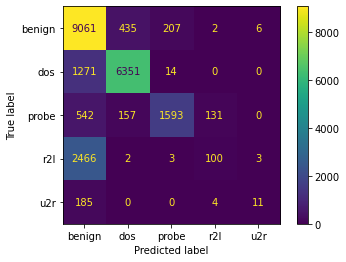

In [ ]:
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix = results, display_labels = ['benign', 'dos', 'probe', 'r2l', 'u2r'])

cm_display.plot()
plt.show()

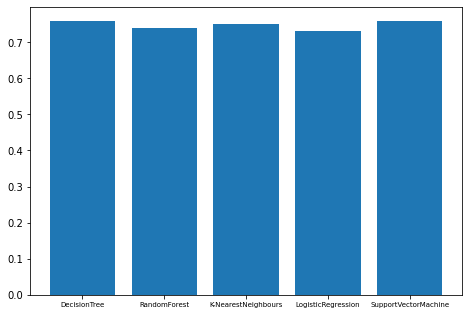

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
classifiers = ['DecisionTree', 'RandomForest', 'K-NearestNeighbours', 'LogisticRegression', 'SupportVectorMachine']
accuracies = [0.76,0.74,0.75,0.73,0.76]
ax.tick_params(axis='x', which='major', labelsize=7)
ax.tick_params(axis='x', which='minor', labelsize=6)
ax.bar(classifiers,accuracies)
plt.show()